In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
X,y = mnist.data.to_numpy(),mnist.target.to_numpy()


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Multioutput Classification
1) generalization of multilabel classification where each label can be multiclass(i.e, it can have more than 2 possible values(0/1))

To illustrate this, let’s build a system that removes noise from images. It will take as input a noisy digit image, and it will (hopefully) output a clean digit image, represented as an array of pixel intensities, just like the MNIST images. Notice that the classifier’s output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255).


In [2]:
import numpy as np

np.random.seed(42)
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise

noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

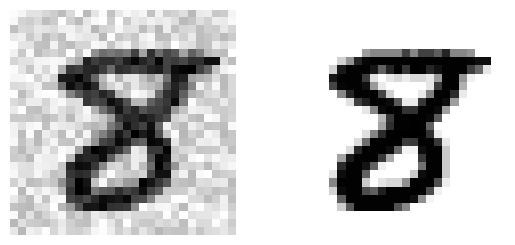

In [4]:
import matplotlib.pyplot as plt

# Plot digit function
def plot_digit(digit_data):
    digit_image = digit_data.reshape(28, 28)

    plt.imshow(digit_image, cmap='binary')
    plt.axis('off')

plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
plt.show()

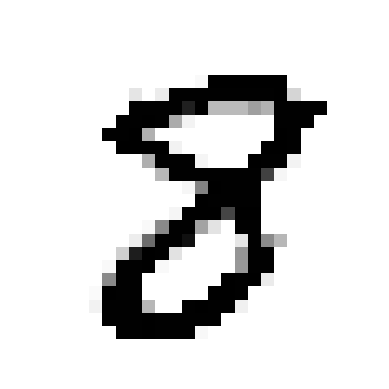

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()